In [1]:
from utils import *

## Modèle Logistique

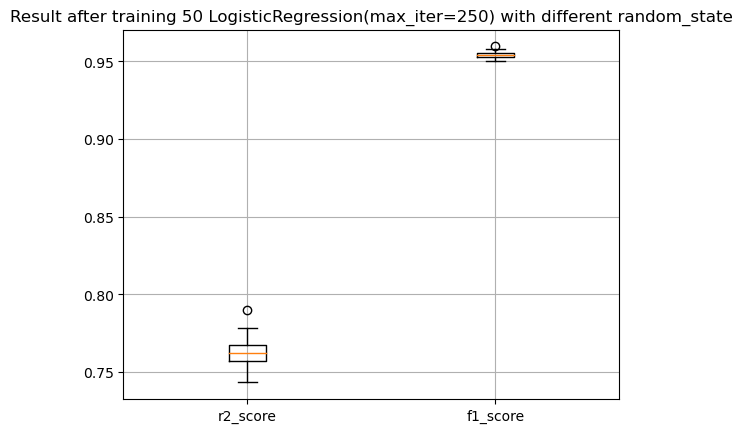

In [2]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=250)
value = multi_test(logistic_model,n=50,random_start=420,test_size=0.25)

Grid Search Progress: 100%|██████████| 72/72 [21:43<00:00, 18.11s/it]


LogisticRegression(C=10, max_iter=500, tol=1e-05)


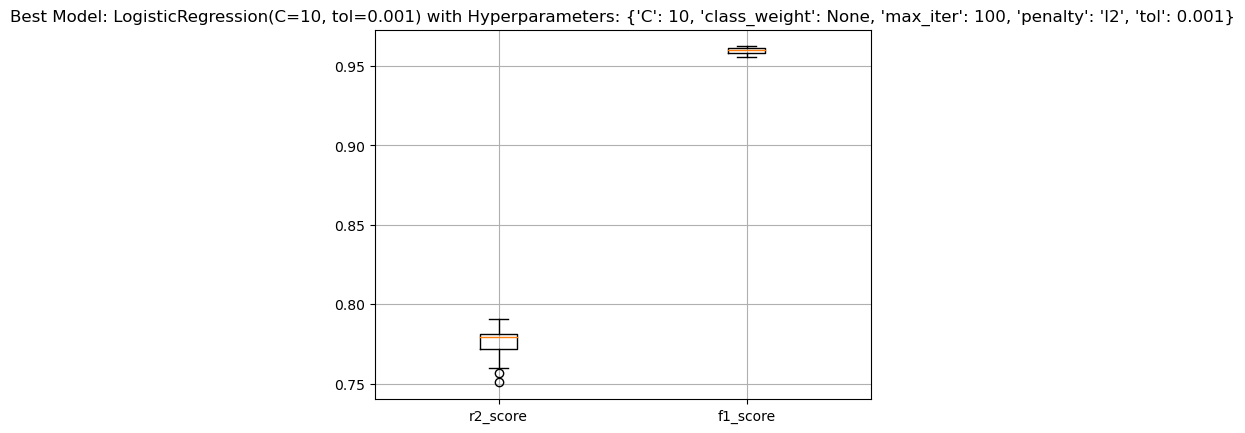

Best hyperparameters: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}
Best score (f1_score): 0.9593612235716923


In [2]:
import warnings
warnings.filterwarnings("ignore")

hyperparameters = {
    "penalty": [ "l2"],
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced', None],
    'max_iter': [100,250,500],
    'tol': [1e-3,1e-4, 1e-5],
    "n_jobs":[6],
}

logistic_model = LogisticRegression()

best_model, best_params, best_score, all_results = grid_search(
    logistic_model, X_np_train, Y_np_train, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Logistic_Regression/grid_best_model.joblib" ,display_boxplot=True)

In [3]:
logistic_model = LogisticRegression(max_iter=250)
test = submission(logistic_model,name_file="logistic_soumission.csv")

### Random Forest

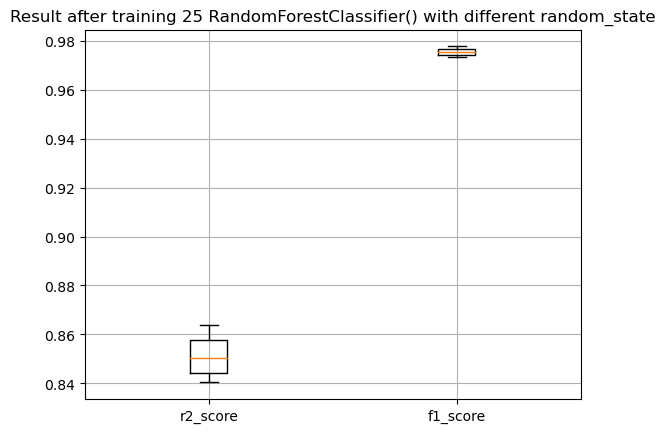

In [4]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()
value = multi_test(forest_model,n=25,random_start=420,test_size=0.25)

In [7]:
forest_model = RandomForestClassifier(n_estimators=500)
test = submission(forest_model,name_file="forest_soumission.csv")

Grid Search Progress: 100%|██████████| 15/15 [2:02:45<00:00, 491.00s/it]  


RandomForestClassifier(criterion='log_loss', n_estimators=800, n_jobs=6)


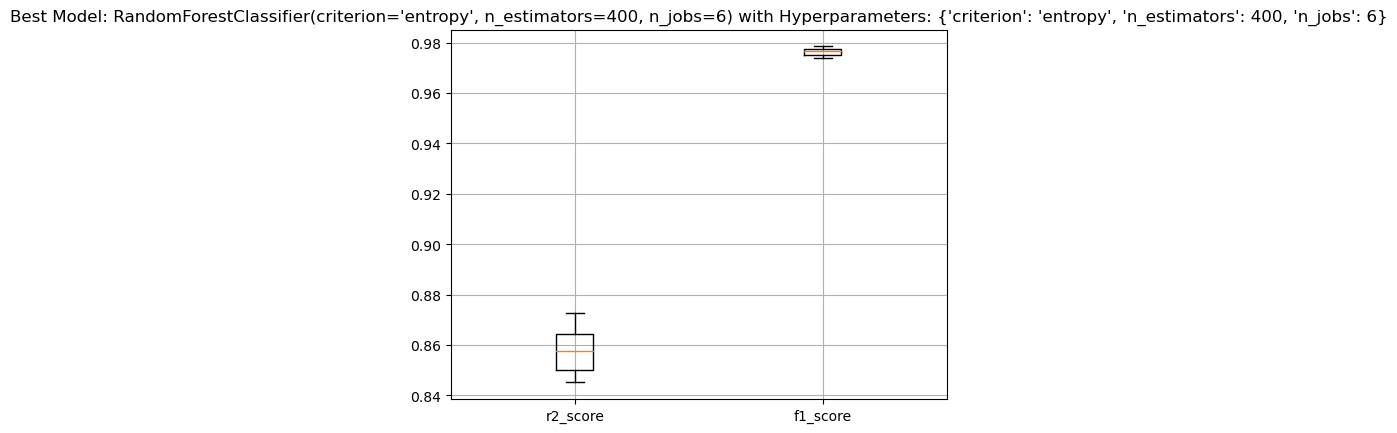

Best hyperparameters: {'criterion': 'entropy', 'n_estimators': 400, 'n_jobs': 6}
Best score (f1_score): 0.9765180064159114


In [8]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters = {
    "criterion": [ "gini",'entropy','log_loss'],
    'n_estimators': [50, 100,200,400,800],
    #'max_depth': [20,50,100,200,400],
    "n_jobs":[6],
}

logistic_model = RandomForestClassifier()

best_model, best_params, best_score, all_results = grid_search(
    logistic_model, X_np_train, Y_np_train, hyperparameters, n=25, random_start= 42,
    saving_path="Archives_Model/Random_Forest/grid_best_model.joblib" ,display_boxplot=True)